# <span style ='color:#74B72E'>Stock Market Analysis - Time Series 
## <span style ='color:#FCA510'> <bu>EXPLORATORY NOTEBOOK</bu>

- by Annie Carter
- Sourced by Yahoo Finance

![Image-3.png](https://images.theconversation.com/files/526640/original/file-20230516-23-zv2vps.jpg?ixlib=rb-1.1.0&rect=121%2C80%2C4372%2C2910&q=20&auto=format&w=320&fit=clip&dpr=2&usm=12&cs=strip)

 Custom Palette = Pear#74B72E, Fire #FCA510

In [2]:
# Wrangle
# import wrangle as w
import os

# Transform 
import numpy as np
import pandas as pd

# Visualize 
import matplotlib.pyplot as plt
import seaborn as sns

# Working with dates
from datetime import datetime

# Modeling
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing

# Evaluate
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

## <span style ='color:#74B72E'>ACQUIRE

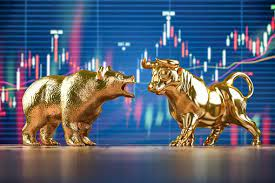

#### Acquired stock market data from Yahoo Finance for Nike, Coca-Cola, Boeing
- Downloaded stock csv. for last 5 years of daily stock market values
- Add Symbol column for each stock dataframe
- concated data frames by Symbol
- 8 columns, 1758 rows 
- Checked for nulls (0) and duplications (0)

In [3]:
# # def prep_stocks():
#      ''' 
# # The below functions prepares aaple, Microsoft, Visa and American Express 
#     '''
# Save and read dataset csv from yahoo.finance.com
df_aapl = pd.read_csv('AAPL.csv')
df_msft = pd.read_csv('MSFT.csv')  
df_v = pd.read_csv('V.csv')
df_axp = pd.read_csv('AXP.csv')

In [4]:
df_aapl.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
1255,2023-08-11,177.320007,178.619995,176.550003,177.789993,177.789993,51988100
1256,2023-08-14,177.970001,179.690002,177.309998,179.460007,179.460007,43597400


In [7]:
df_aapl['Symbol'] = 'AAPL'

In [6]:
df_aapl.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2018-08-15,52.3050,52.685001,52.0825,52.560001,50.338474,115230400,AAPL
1,2018-08-16,52.9375,53.452499,52.8675,53.330002,51.075951,114001600,AAPL


In [8]:
df_aapl.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,112.934213,114.278560,111.678819,113.035843,111.567868,1.091752e+08
std,46.777554,47.279022,46.300213,46.804809,47.072149,5.494740e+07
min,35.994999,36.430000,35.500000,35.547501,34.163830,3.145820e+07
25%,61.855000,63.880001,60.720001,61.935001,60.485706,7.393830e+07
50%,126.500000,127.769997,125.010002,126.040001,124.481178,9.463960e+07
75%,150.089996,151.570007,148.610001,150.589996,149.402573,1.281680e+08
max,196.240005,198.229996,195.279999,196.449997,196.185074,4.265100e+08


In [9]:
df_msft.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
1255,2023-08-11,320.260010,322.410004,319.209991,321.010010,321.010010,24342600
1256,2023-08-14,321.390015,324.059998,320.079987,324.040009,324.040009,18808100


In [10]:
df_msft['Symbol'] = 'MSFT'

In [11]:
df_msft.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
1255,2023-08-11,320.260010,322.410004,319.209991,321.010010,321.010010,24342600,MSFT
1256,2023-08-14,321.390015,324.059998,320.079987,324.040009,324.040009,18808100,MSFT


In [12]:
df_msft.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,218.200509,220.522538,215.808043,218.271933,214.265353,3.028239e+07
std,72.167307,72.889168,71.432287,72.183399,73.153031,1.289737e+07
min,95.139999,97.970001,93.959999,94.129997,89.756630,8.989200e+06
25%,144.399994,146.419998,142.990005,144.460007,139.311005,2.232760e+07
50%,229.270004,232.860001,226.410004,228.850006,225.936432,2.703390e+07
75%,278.029999,281.279999,275.399994,277.750000,275.348450,3.426400e+07
max,361.750000,366.779999,352.440002,359.489990,359.489990,1.112421e+08


In [14]:
df_v.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
1255,2023-08-11,240.000000,240.720001,238.419998,240.039993,240.039993,3606800
1256,2023-08-14,240.720001,243.330002,240.259995,242.899994,242.899994,4350000


In [15]:
df_v['Symbol'] = 'V'

In [16]:
df_v.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,196.936412,198.920302,194.957351,196.966110,193.603201,8.222789e+06
std,29.285594,29.421574,29.177104,29.287756,30.106414,3.765973e+06
min,122.080002,125.209999,121.599998,121.730003,117.899208,1.993500e+06
25%,178.380005,179.949997,176.679993,178.429993,173.944321,5.692100e+06
50%,203.029999,205.380005,200.580002,203.039993,199.822708,7.302500e+06
75%,219.960007,221.800003,217.509995,220.009995,217.190414,9.689400e+06
max,250.050003,252.669998,248.220001,250.929993,246.838379,3.837960e+07


In [17]:
df_aapl=df_aapl.drop(df_aapl.index[0]) 

In [18]:
df_aapl.shape

(1256, 8)

In [19]:
df_axp.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
1255,2023-08-11,162.669998,165.779999,162.600006,165.270004,165.270004,2102500
1256,2023-08-14,164.330002,166.479996,163.770004,166.080002,166.080002,1827300


In [20]:
df_axp['Symbol'] = 'AXP'

In [21]:
df_axp.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2018-08-15,101.570000,101.930000,100.839996,101.510002,94.560913,2219600,AXP
1,2018-08-16,101.900002,103.139999,101.870003,102.650002,95.622833,2290400,AXP


In [22]:
print(f'Apple dataframe shape: {df_aapl.shape}')
print (f'Microsoft dataframe shape: {df_msft.shape}')
print(f'Visa dataframe shape: {df_v.shape}')
print(f'American Express dataframe shape: {df_axp.shape}')

Apple dataframe shape: (1256, 8)
Microsoft dataframe shape: (1257, 8)
Visa dataframe shape: (1257, 8)
American Express dataframe shape: (1257, 8)


##  <span style ='color:#74B72E'>PREPARE
- **Data Transformation:** Concat the 3 stock dataframes into 1 dataframe; convert 'Date' to DateTime
- **Handling Missing Values:** 0 nulls

- **Removing Duplicates:** 0 duplictes

- **Data Cleaning:** 0 outliers
- **Feature Selection:** Predicting Future Stock Values 'close'

# TRIAL BY 🔥🔥 LESSONS LEARNED

#### I realized the original data sets did not have same of rows. Be sure to download equal number of days in for CSV. Did head and tail to make sure that they had the same amount of days and both started and finished at the same time. I deleted one row from aapl, it was a day ahead. 

![Image.png](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRxvlo2vR0tw3r_g4aTkbwSaOnHPJucvfIwuQ&usqp=CAU)

In [23]:
#this creates a variables containing both dataframes created above
frames = [df_aapl, df_msft, df_v, df_axp]
 

In [24]:
#this creates a new dataframe using the above variable and combining both dataframes
df_stocks = pd.concat(frames)  
df_stocks.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
651,2021-03-18,122.879997,123.180000,120.320000,120.529999,118.771523,121229700,AAPL
1224,2023-06-28,167.259995,169.869995,167.199997,169.779999,169.199783,2289000,AXP
305,2019-10-31,117.790001,118.209999,116.889999,117.279999,111.253510,2507400,AXP
233,2019-07-22,50.912498,51.807499,50.902500,51.805000,50.194595,89111600,AAPL
161,2019-04-08,119.809998,120.019997,118.639999,119.930000,114.846336,15116200,MSFT


In [25]:
# Review shape to determine processing needs, will use sample size due to network restrictions for exploration
df_stocks.shape

(5027, 8)

In [26]:
#Review data to look at columns datatypes and nulls
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5027 entries, 1 to 1256
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5027 non-null   object 
 1   Open       5027 non-null   float64
 2   High       5027 non-null   float64
 3   Low        5027 non-null   float64
 4   Close      5027 non-null   float64
 5   Adj Close  5027 non-null   float64
 6   Volume     5027 non-null   int64  
 7   Symbol     5027 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 353.5+ KB


In [27]:
# Quick review of data in columns started with 40 then transpose for readiability with head of 5
df_stocks.duplicated().value_counts()

False    5027
dtype: int64

In [28]:
df_stocks.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Symbol       0
dtype: int64

In [29]:
#Convert 'Date' into datetime dtype
df_stocks.Date = pd.to_datetime(df_stocks.Date)
df_stocks.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Symbol               object
dtype: object

In [30]:
#Make 'Date' column index of Dataframe
df_stocks = df_stocks.set_index('Date').sort_index()


In [31]:
#created sample DF with random state of 42 to review and clean data rapidly
df_stocks.head(2)


,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2018-08-15,140.350006,140.690002,138.839996,139.919998,135.070847,5288400,V
2018-08-15,101.570000,101.930000,100.839996,101.510002,94.560913,2219600,AXP


### <span style ='color:#FCA510'>PREPARATION FUNCTIONS FOR FINAL NOTEBOOK 

In [ ]:
#Min date Aug 14 2018 - Aug 15 2023, 5 year lookvck of stocks
df_stocks.index.min(), df_stocks.index.max()

<Axes: xlabel='Date'>

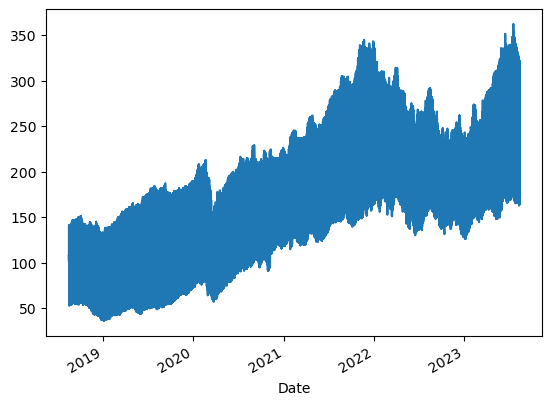

In [32]:
df_stocks.Open.plot()

In [50]:

# train = df_stocks.resample('D').groupby('Symbol')['close_price'].sum()
# train = pd.DataFrame(train)

# train_size = 0.70
# n = df_stocks.shape[0]
# test_start_index = round(train_size * n)
# train_targets = ['Close', 'Symbol']

# train = df_stocks[train_targets][:test_start_index]  # Select columns and rows for training
# test = df_stocks[train_targets][test_start_index:]   # Select columns and rows for testing
# # Reset the index of the 'train' DataFrame to access the date information
# train.reset_index(inplace=True)

# # Create additional columns based on the index
# train["year"] = train['Date'].dt.year
# train["month"] = train['Date'].dt.strftime('%B')  # Full month name
# train["week_day"] = train['Date'].dt.strftime('%A')  # Full day name
# train["day_of_month"] = train['Date'].dt.day
# train["month_number"] = train['Date'].dt.month
# train["week_day_number"] = train['Date'].dt.weekday

# train.head()
import pandas as pd
train_size = 0.70
n = df_stocks.shape[0]
test_start_index = round(train_size * n)

# Select the appropriate columns and rows for training and testing
train_data = df_stocks.iloc[:test_start_index]
test_data = df_stocks.iloc[test_start_index:]

# Assuming 'df_stocks' is the DataFrame containing stock data and 'Symbol' is the column containing stock symbols
# Replace 'close_price' with the actual column name for the stock's closing price

train_data = pd.DataFrame(train_data)



# Reset the index of the 'train_data' DataFrame to access the date information
train_data.reset_index(inplace=True)

# Create additional columns based on the index
train_data["year"] = train_data['Date'].dt.year
train_data["month"] = train_data['Date'].dt.strftime('%B')  # Full month name
train_data["week_day"] = train_data['Date'].dt.strftime('%A')  # Full day name
train_data["day_of_month"] = train_data['Date'].dt.day
train_data["month_number"] = train_data['Date'].dt.month
train_data["week_day_number"] = train_data['Date'].dt.weekday

train_data.head()



,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,year,month,week_day,day_of_month,month_number,week_day_number
0,2018-08-15,140.350006,140.690002,138.839996,139.919998,135.070847,5288400,V,2018,August,Wednesday,15,8,2
1,2018-08-15,101.570000,101.930000,100.839996,101.510002,94.560913,2219600,AXP,2018,August,Wednesday,15,8,2
2,2018-08-15,108.489998,108.989998,106.820000,107.660004,102.216438,29982800,MSFT,2018,August,Wednesday,15,8,2
3,2018-08-16,101.900002,103.139999,101.870003,102.650002,95.622833,2290400,AXP,2018,August,Thursday,16,8,3
4,2018-08-16,141.070007,141.490005,140.419998,140.649994,135.979614,5931700,V,2018,August,Thursday,16,8,3


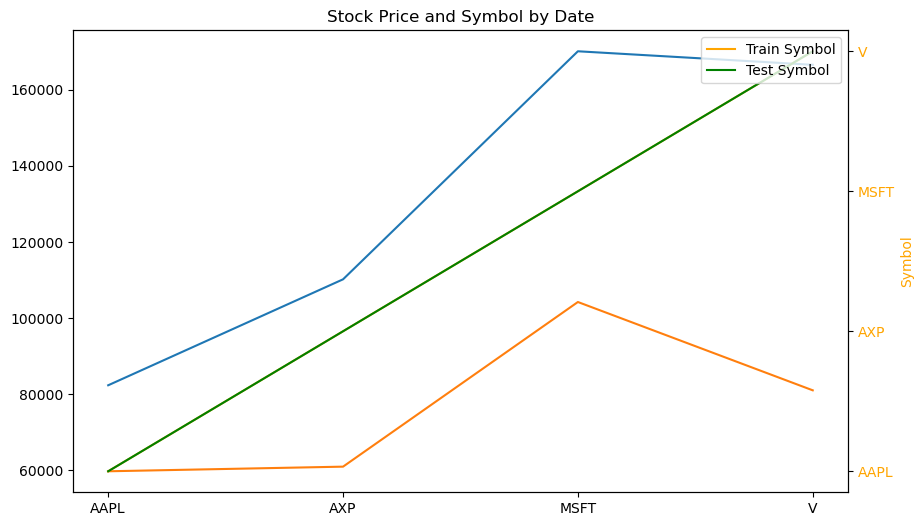

In [60]:
#import matplotlib.pyplot as plt

# Assuming 'train_data' and 'test_data' are the DataFrames for training and testing data
train_size = train_data.groupby('Symbol')['Close'].sum()
test_size = test_data.groupby('Symbol')['Close'].sum()

plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Plotting the 'close_price' column for training and testing
plt.plot(train_size.index, train_size, label='Train close_price')
plt.plot(test_size.index, test_size, label='Test close_price')

# Plotting the 'Symbol' column for training and testing (using a second y-axis)
ax2 = plt.gca().twinx()  # Create a second y-axis sharing the same x-axis
ax2.plot(train_size.index, train_size.index, color='orange', label='Train Symbol')
ax2.plot(test_size.index, test_size.index, color='green', label='Test Symbol')
ax2.set_ylabel('Symbol', color='orange')  # Set y-axis label for the 'Symbol' column
ax2.tick_params(axis='y', labelcolor='orange')  # Set y-axis tick color

# Set x-axis label and title
plt.xlabel('Date')
plt.title('Stock Price and Symbol by Date')

# Add legends
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()  # Show the plot



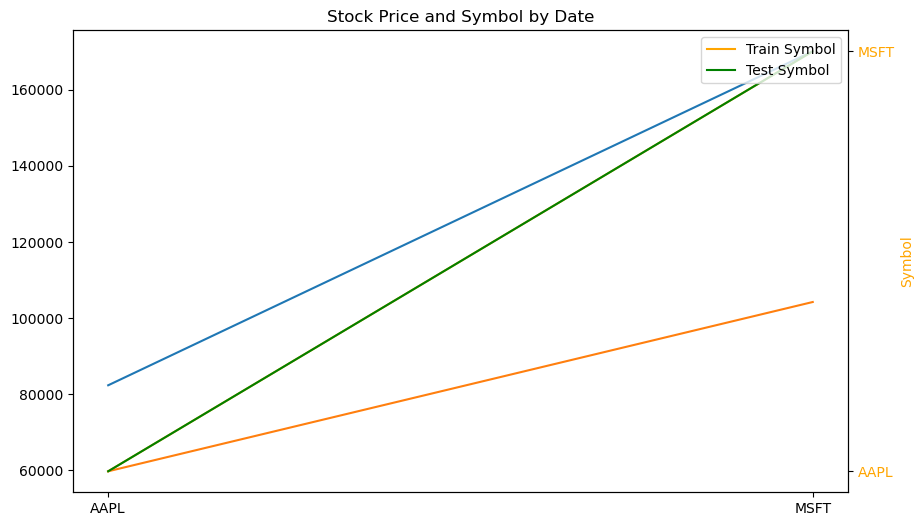

In [61]:
import matplotlib.pyplot as plt

# Assuming 'train_data' and 'test_data' are the DataFrames for training and testing data
symbols_to_plot = ['AAPL', 'MSFT']

# Filter train_data and test_data to include only 'AAPL' and 'MSFT' symbols
train_data_filtered = train_data[train_data['Symbol'].isin(symbols_to_plot)]
test_data_filtered = test_data[test_data['Symbol'].isin(symbols_to_plot)]

train_size = train_data_filtered.groupby('Symbol')['Close'].sum()
test_size = test_data_filtered.groupby('Symbol')['Close'].sum()

plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Plotting the 'Close' column for training and testing
plt.plot(train_size.index, train_size, label='Train Close')
plt.plot(test_size.index, test_size, label='Test Close')

# Plotting the 'Symbol' column for training and testing (using a second y-axis)
ax2 = plt.gca().twinx()  # Create a second y-axis sharing the same x-axis
ax2.plot(train_size.index, train_size.index, color='orange', label='Train Symbol')
ax2.plot(test_size.index, test_size.index, color='green', label='Test Symbol')
ax2.set_ylabel('Symbol', color='orange')  # Set y-axis label for the 'Symbol' column
ax2.tick_params(axis='y', labelcolor='orange')  # Set y-axis tick color

# Set x-axis label and title
plt.xlabel('Date')
plt.title('Stock Price and Symbol by Date')

# Add legends
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()  # Show the plot


In [ ]:
plt.figure(figsize=(8,4))
train_data.bite.('day_of_month').mean().plot(alpha=.5, label='Daily')
train_data.('month').mean().plot(label='Montly')
train_data('year').mean().plot(label='Yearly')
plt.title("General dog bite trend over time")
plt.xlabel('date of bite')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
#target variable "Close" df saved for training
y = train[['Close', 'Symbol']]
y.head()

In [ ]:
#This is a graph of rolling average grouped by symbol and resampled by W

# Group by 'Symbol' and resample to weekly frequency while calculating the mean
weekly_mean_df = df_stocks.groupby('Symbol').resample('W')['Close'].mean()

# Calculate rolling averages for 'v', 'aapl', and 'msft' with window sizes of 3, 5, and 7 days
rolling_df = pd.DataFrame()
for symbol in ['AAPL', 'MSFT']:
    for window_size in [3, 5, 7]:
        rolling_avg = weekly_mean_df.loc[symbol].rolling(window_size).mean()
        column_name = f'rolling_{window_size}_{symbol}'
        rolling_df[column_name] = rolling_avg

# Plot the rolling averages
rolling_df.plot()
# Add legend and move it to the far right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Add ylabel
plt.ylabel('Stock Close Price Rolling Average')
plt.show()

In [ ]:
#This is a graph of rolling average grouped by symbol and resampled by W

# Group by 'Symbol' and resample to weekly frequency while calculating the mean
weekly_mean_df = df_stocks.groupby('Symbol').resample('W')['Close'].mean()

# Calculate rolling averages for 'V, 'AXP' with window sizes of 3, 5, and 7 days
rolling_df = pd.DataFrame()
for symbol in ['V', 'AXP']:
    for window_size in [3, 5, 7]:
        rolling_avg = weekly_mean_df.loc[symbol].rolling(window_size).mean()
        column_name = f'rolling_{window_size}_{symbol}'
        rolling_df[column_name] = rolling_avg

# Plot the rolling averages
rolling_df.plot()
# Add legend and move it to the far right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Add ylabel
plt.ylabel('Stock Close Price Rolling Average')
plt.show()

In [ ]:
#Plot of stocks by month
df_stocks.Close.resample('M').mean().plot(marker='o')

In [ ]:
# Resample by year and calculate the mean close price
y_year = y.groupby(['AAPL', pd.Grouper(freq='Y')])['Close'].mean()

plt.figure(figsize=(45, 30)) 

# Plotting the average close price by month for different symbols
ax = y_year.unstack('Symbol').plot(kind='vr', width=0.9, ec='black')

plt.xticks(rotation=45)
ax.set(title='Average Close Price by Year', xlabel='Year', ylabel='Close')

plt.legend(title='Symbol')


plt.show()  # Show the plot



In [ ]:
plt.figure(figsize=(8,4))
train.df_aapl.resample('D').mean().plot(alpha=.5, label='Daily')
train.df_aapl.resample('W').mean().plot(alpha=.8, label='Weekly')
train.df_aapl.resample('M').mean().plot(label='Montly')
train.df_aapl.resample('Y').mean().plot(label='Yearly')
plt.title('Stock Symbols')
plt.xlabel('Average Close Price by Year')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# Resample by week and calculate the mean close price
y_week = y.groupby(['Symbol', pd.Grouper(freq='W')])['Close'].mean()

# Filter for the year 2023
y_week_2023 = y_week.loc[y_week.index.year == 2023]

# Sort the data
y_week_2023_sorted = y_week_2023.sort_values(ascending=False)

# Plot the average close price by weekday for the year 2023
ax = y_week_2023_sorted.groupby(y_week_2023_sorted.index.day_name()).mean().plot.vr(width=0.9, ec='black')

plt.xticks(rotation=90)
ax.set(title='Average Close Price by Weekday (Year 2023)', xlabel='Weekday', ylabel='Close')

plt.show()


In [ ]:
y_week.index.info()

In [ ]:
#Average close price by Month and Symbol. Unequal dataframes. 

# Assuming 'y' is your DataFrame containing the data

plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Group by month and symbol, calculate the mean, and create a vr plot
ax = y.groupby([y.index.month, 'Symbol']).mean().unstack()['Close'].plot.vr(width=0.9, ec='black')

plt.xticks(rotation=0)
ax.set(title='Average Close Price by Month and Symbol', xlabel='Month', ylabel='Close price')
plt.legend(title='Symbol')  # Add legend with 'Symbol' title

plt.show()  # Show the plot


In [ ]:
# Assuming 'y' is your DataFrame containing the data

plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Create a stacked histogram using Seaborn
ax = sns.histplot(data=y, x='Close', hue='Symbol', multiple='stack', bins=20, element='step', linewidth=1.5)

plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Stacked Histogram of Close Prices by Symbol')

plt.legend(title='Symbol') 

plt.show()  # Show the plot



In [ ]:
# ## CODE FAILED NEED TO ADJUST
# ## need to adjust dataframe rows so that all symbols have same # of rows in dataframe. 


# plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# # Create separate histograms for each symbol using Seaborn
# ax1 = sns.histplot(data=y[y['Symbol'] == 'v'], x=y.index.month, bins=20, element='step', linewidth=1.5, label='Symbol v')
# ax2 = sns.histplot(data=y[y['Symbol'] == 'msft'], x=y.index.month, bins=20, element='step', linewidth=1.5, label='Symbol msft')

# plt.xlabel('Month')
# plt.ylabel('Frequency')
# plt.title('Stacked Histogram of Close Prices by Symbol and Month')

# plt.legend(title='Symbol') 

# plt.show()  # Show the plot


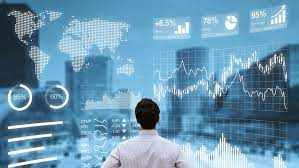

In [ ]:
aapl_data = y[y['Symbol'] == 'AAPL']
aapl_data.resample('D').mean().plot(alpha=0.5, label='Daily')
aapl_data.resample('W').mean().plot(alpha=0.8, label='Weekly')
aapl_data.resample('M').mean().plot(label='Monthly')
aapl_data.resample('Y').mean().plot(label='Yearly')

plt.title("Apple Stock Growth Over Time")
plt.xlabel('Apple Stock Date')
plt.ylabel('Average Stock Price')
plt.legend()
plt.tight_layout() 
plt.show()

In [ ]:
# Yearly Apple Close Price bits
plt.figure(figsize=(7,3))
y.groupby("Date").aaple_data.mean().plot(kind="bar", color=colors)
plt.title("Monthly Apple Stock Close")
plt.xticks(range(12), x_labels)
plt.xlabel("Month")
plt.ylabel("Price")
plt.xticks(rotation=0)
plt.show()

In [ ]:
aapl_data = y[y['Symbol'] == 'MSFT']
aapl_data.resample('D').mean().plot(alpha=0.5, label='Daily')
aapl_data.resample('W').mean().plot(alpha=0.8, label='Weekly')
aapl_data.resample('M').mean().plot(label='Monthly')
aapl_data.resample('Y').mean().plot(label='Yearly')

plt.title("Microsoft Stock Growth Over Time")
plt.xlabel('Microsoft Sttock Date')
plt.ylabel('Average Stock Price')
plt.legend()
plt.tight_layout() 
plt.show()

In [ ]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))  # Adjust the figure size as needed
mean_stocks = train[train['Symbol'] == 'AAPL'].groupby('Year')['df_stocks'].mean()

mean_stocks.plot(kind="bar")
plt.title("Yearly Mean of AAPL Stock")
plt.xlabel("Year")
plt.ylabel("Mean Stock Value")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [ ]:
df_resampled = df_stocks.resample('M')[['quantity','sales_total']].sum()

# Drop February 29th from our dataset (a leap year date)
df_resampled = df_resampled[df_resampled.index != '%02-29']

##  <span style ='color:#74B72E'>DATA SPLIT

In [ ]:
train_size = int(len(df_stocks) * .5)
validate_size = int(len(df_stocks_resampled) * .3)
test_size = int(len(df_resampled) - train_size - validate_size)
validate_end_index = train_size + validate_size

# split into train, validation, test
train = df_resampled[: train_size]
validate = df_resampled[train_size : validate_end_index]
test = df_resampled[validate_end_index : ]

## <span style ='color:#FCA510'>APPLE TIME-SERIES FINDINGS

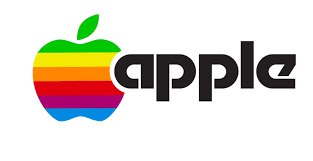


#### DATA VISUALIZATION FINDINGS :


## <span style ='color:#FCA510'>MICROSOFT TIMES-SERIES FINDINGS?

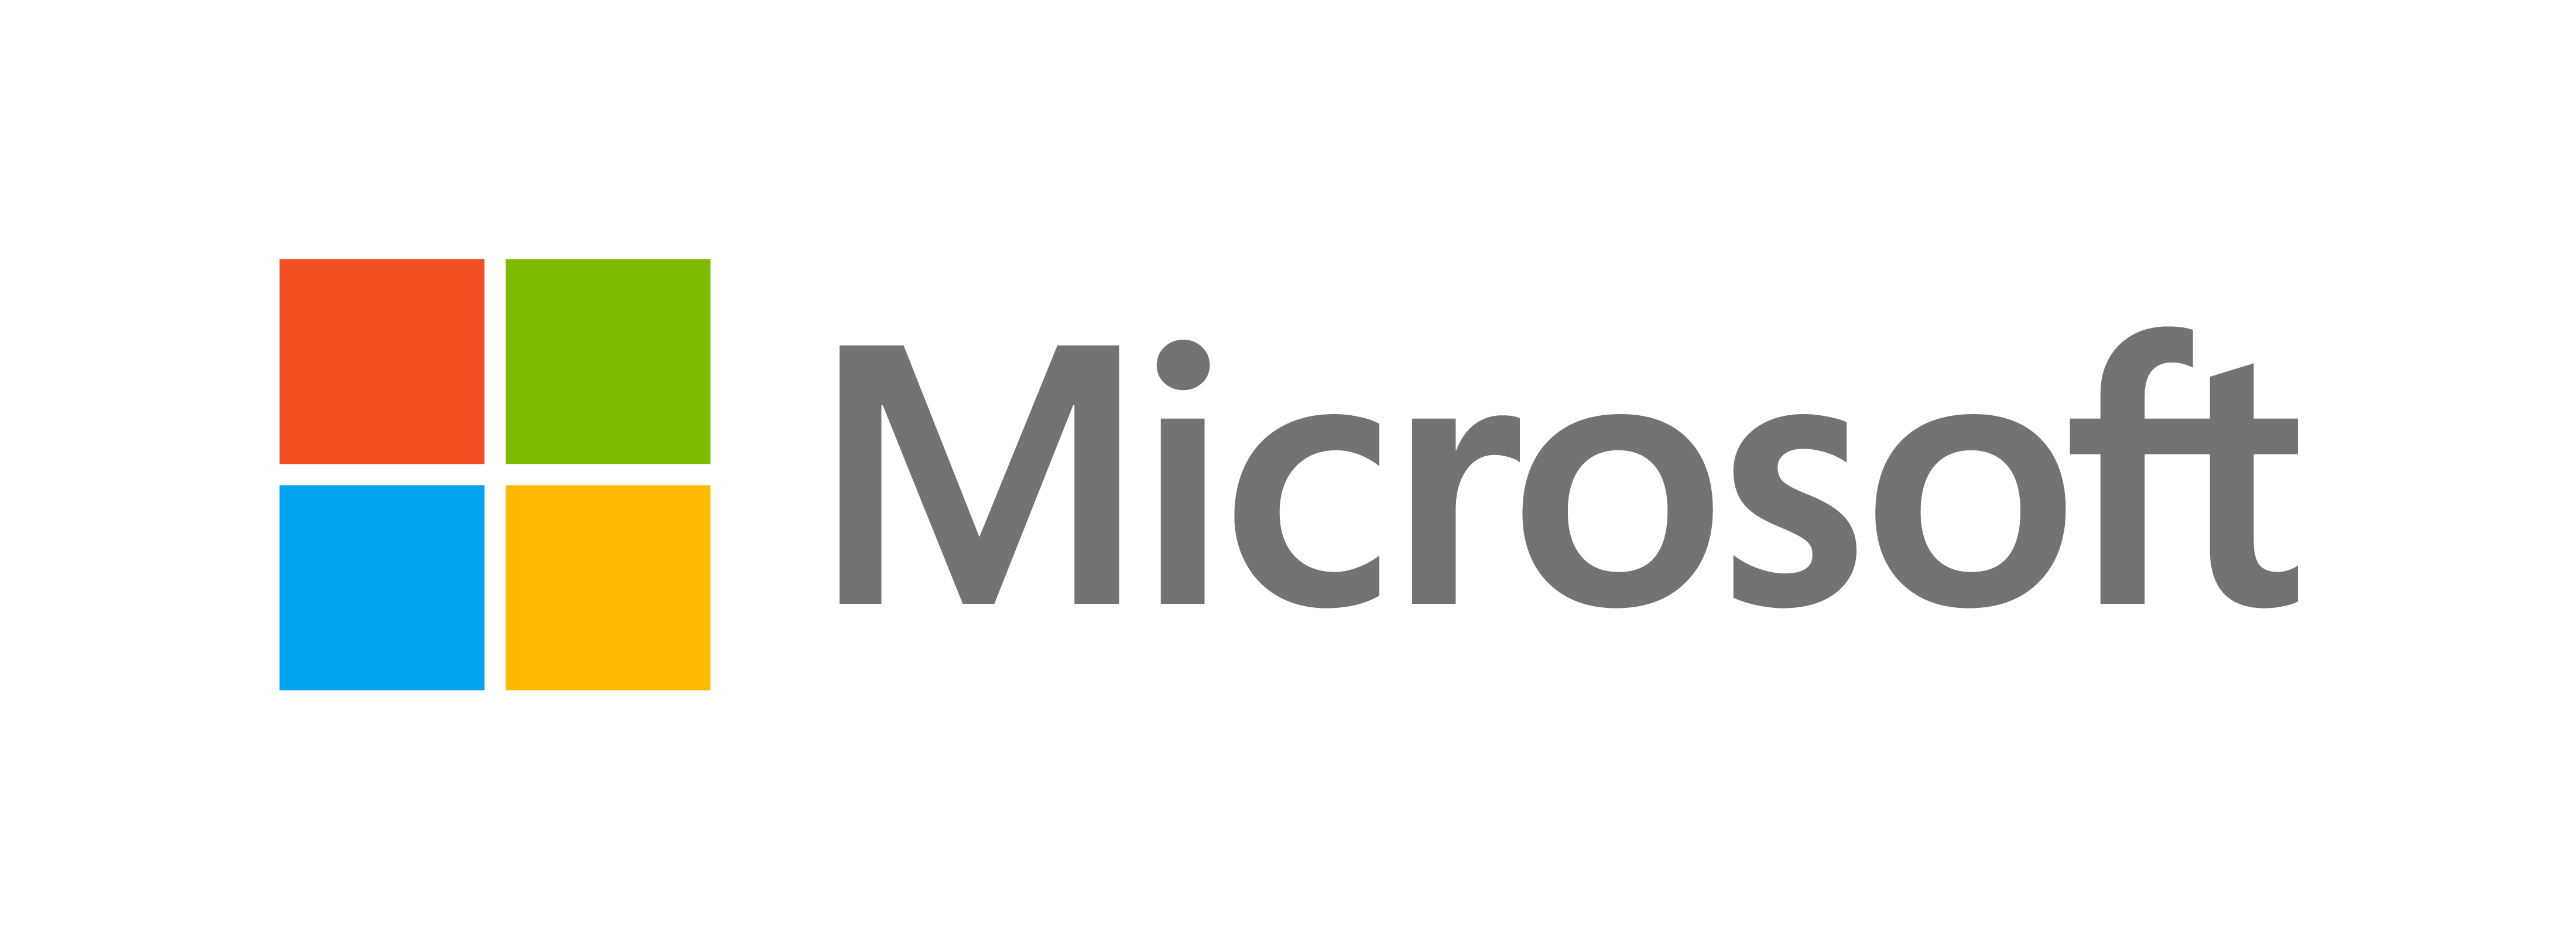
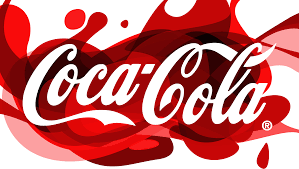

#### DATA VISUALIZATION FINDINGS :

## <span style ='color:#FCA510'> AMERICAN EXPRESS TIMES-SERIES FINDINGS?

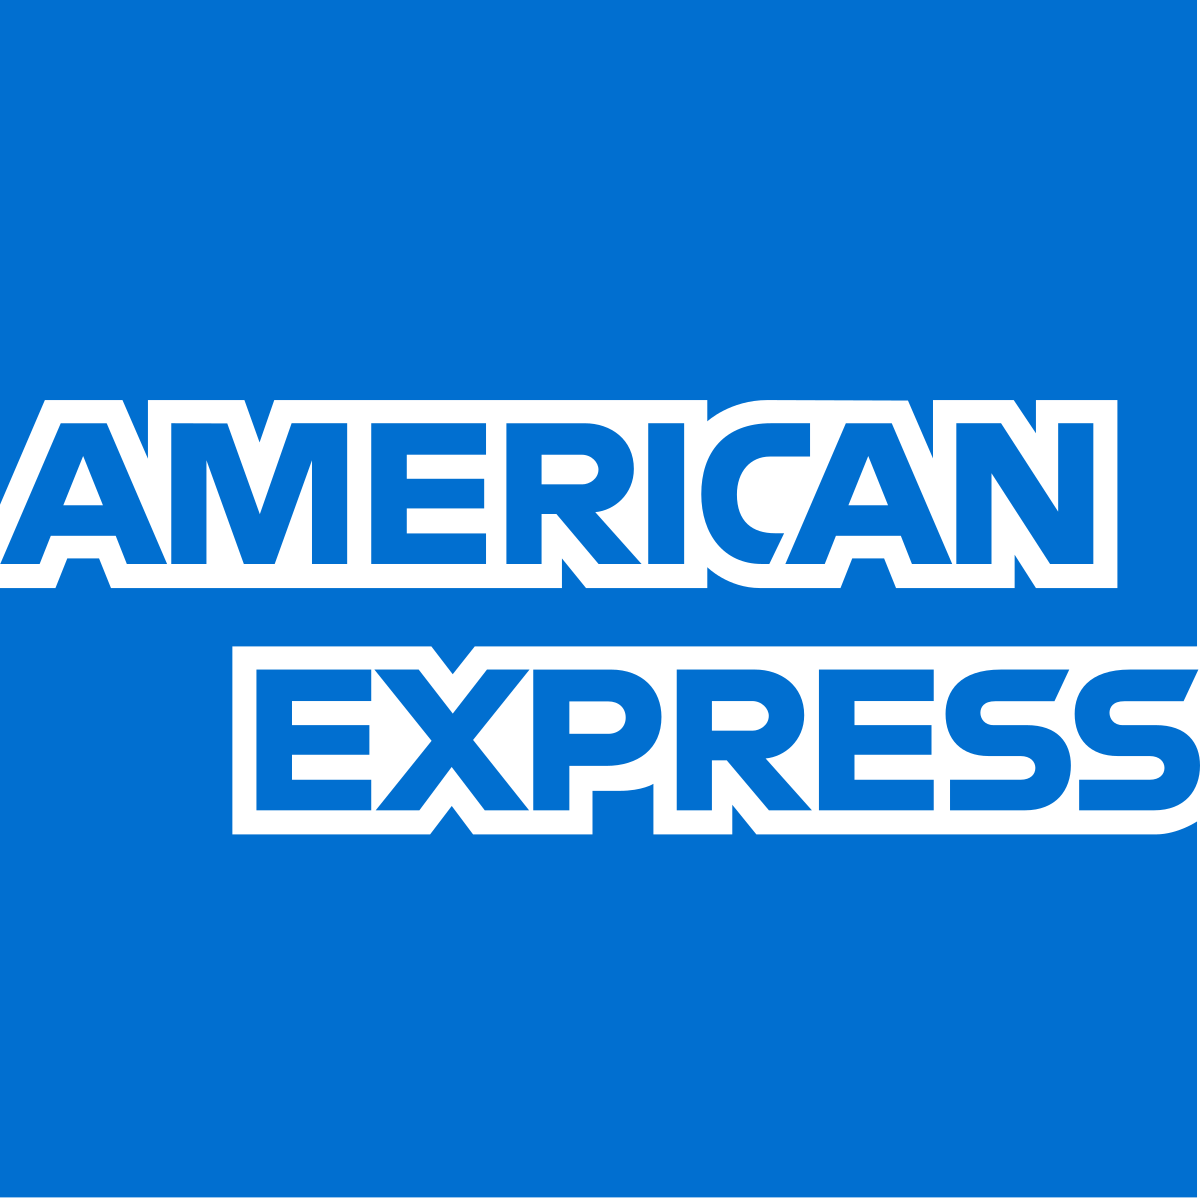

#### DATA VISUALIZATION FINDINGS :

## <span style ='color:#FCA510'> VISA TIMES-SERIES FINDINGS?

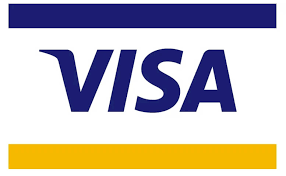

#### DATA VISUALIZATION FINDINGS :

#  <span style ='color:#74B72E'> TIME SERIES MODELING

## <span style ='color:#FCA510'>TRAIN

### <span style ='color:#757C88'> Last Observed Value

### <span style ='color:#757C88'>Simple Average

### <span style ='color:#757C88'>Moving Average

### <span style ='color:#757C88'>Previous Cycle

### <span style ='color:#757C88'>Holt's Linear Trend

### <span style ='color:#757C88'>Holt's Seasonal Trend

## <span style ='color:#FCA510'>VALIDATE
### <span style ='color:#757C88'> Last Observed Value
### <span style ='color:#757C88'>Simple Average
### <span style ='color:#757C88'>Moving Average
### <span style ='color:#757C88'>Previous Cycle
### <span style ='color:#757C88'>Holt's Linear Trend
### <span style ='color:#757C88'>Holt's Seasonal Trend


### TOP MODEL SELECTION: 

## <span style ='color:#FCA510'>TEST

## <span style ='color:#74B72E'> Findings: 
 

## <span style ='color:#241571'> NEXT STEPS



###  <span style ='color:#241571'> START OF NEXT STEPS
#### Time series 